# Cleaning numerical data

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [5]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
customer_df = customer_df.drop('Customer', axis=1)

In [11]:
# Renaming the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(" ", "_")

In [12]:
# Changing effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Numerical - Categorical

In [13]:
numerical_df=customer_df.select_dtypes(np.number)
categorical_df=customer_df.select_dtypes(object)

# Numerical Columns: Discrete and Contunious

In [ ]:
# will get the cont or disc variables from the numerical columns
# numerical_df = customer_df.select_dtypes(exclude='object')

In [14]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [15]:
# checking if I can use nunique function to determine if the column has dicrete or contunious variables
customer_df["income"].nunique()

5694

In [16]:
def differ_cont_disc(df):
    
    df_continuous = pd.DataFrame()
    df_discrete = pd.DataFrame()
    
    for name in df.columns:
        if df[name].nunique() >10:
            df_continuous[name] = df[name]
        else:
            df_discrete[name] = df[name]
    return df_continuous, df_discrete


customer_df_continuous, customer_df_discrete = differ_cont_disc(numerical_df)


In [ ]:
customer_df_continuous

In [ ]:
customer_df_discrete

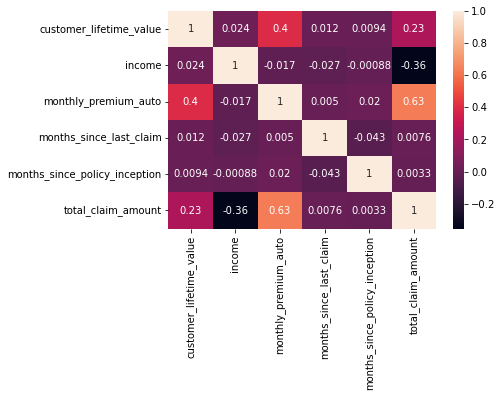

In [19]:
# Plotting a correlation matrix
correlations_matrix = customer_df_continuous.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


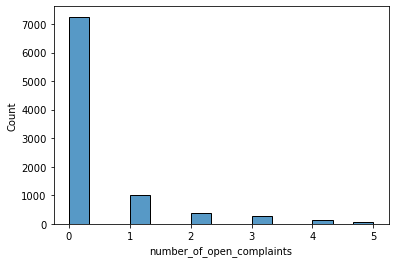

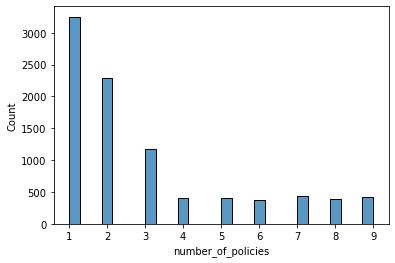

In [20]:
def plot_disc_hist(df):
    for name in df.columns:
        sns.histplot(data=df[name])
        plt.show()
    return

plot_disc_hist(customer_df_discrete)

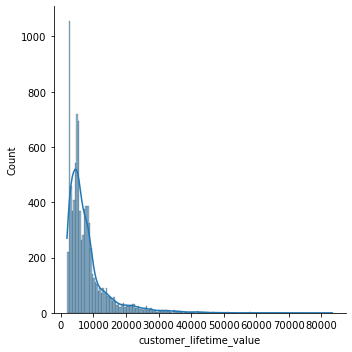

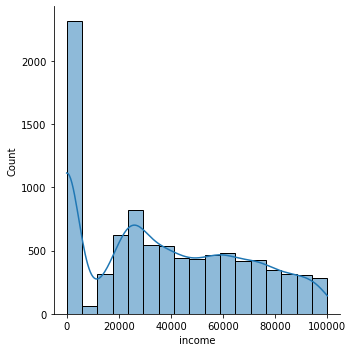

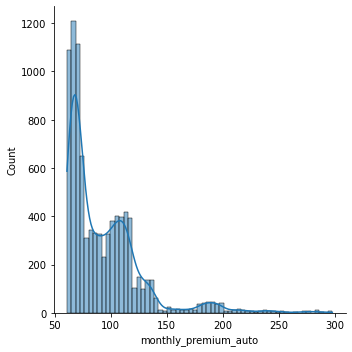

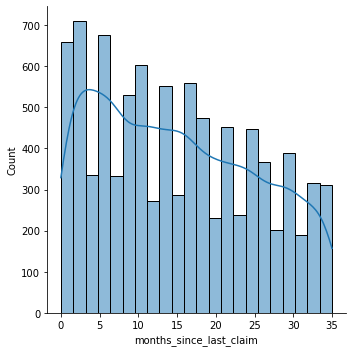

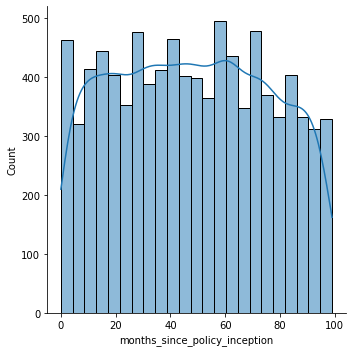

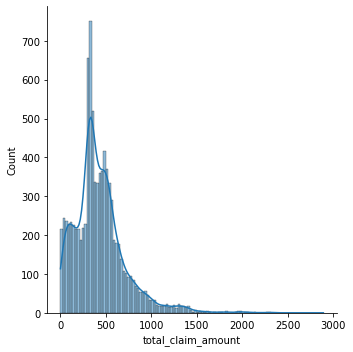

In [21]:
def plot_cont_displot(df):
    for name in df.columns:
        sns.displot(data=df, x=name, kde=True)
    return

plot_cont_displot(customer_df_continuous)

# Outliers

In [ ]:
# def func_for_outliers(df):
#     for name in df.columns:
#         iqr = np.percentile(df[name],75) - np.percentile(df[name],25)
#         print(iqr)
#         upper_limit = np.percentile(df[name],75) + 1.5*iqr
#         lower_limit = np.percentile(df[name],25) - 1.5*iqr
#     return upper_limit, lower_limit

In [ ]:
# upper_limit_cust, lower_limit_cust = func_for_outliers(customer_df)

In [ ]:
# for name in df.columns:
    
#     def rm_outliers(df):
#     iqr = np.percentile(df,75) - np.percentile(df,25)
#     upper_limit1 = np.percentile(df,75) + 1.5*iqr
#     lower_limit1 = np.percentile(df,25) - 1.5*iqr
      
#     return df[(df>lower_limit1) & (df<upper_limit1)].copy()

In [ ]:
# tmp = rm_outliers(customer_df)

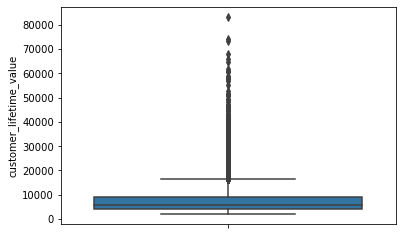

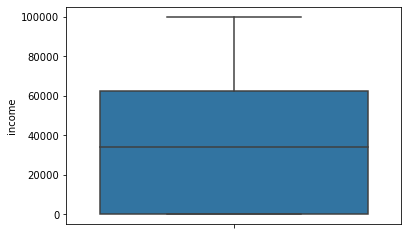

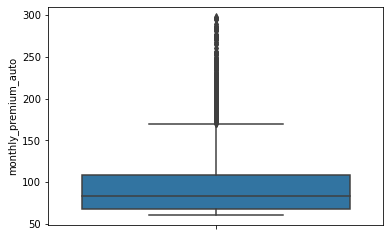

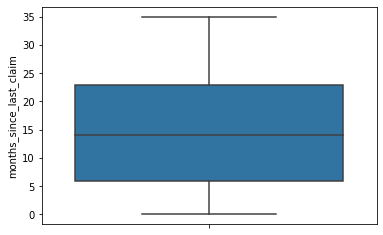

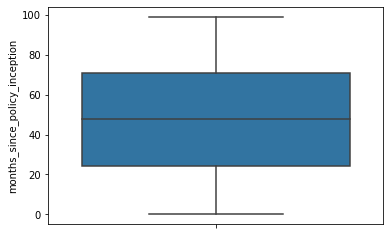

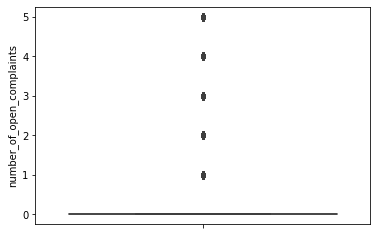

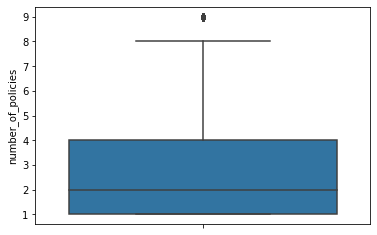

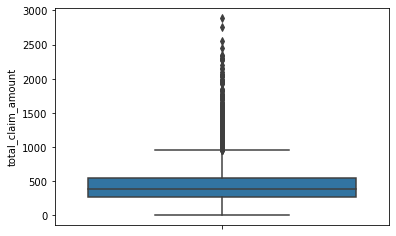

In [22]:
def plot_boxplot(df): # for categorical and discrete-numerical columns
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show()
    return None

plot_boxplot(numerical_df)

In [23]:
def outliers(df,col):
    iqr = np.nanpercentile(df[col],75) - np.nanpercentile(df[col],25)
    upper_limit = np.nanpercentile(df[col],75) + 1.5*iqr
    off_points = df[df[col] >upper_limit]
    return upper_limit, len(off_points)

In [25]:
upper_limit_income,  total_outliers_income= outliers(customer_df,'income')
print(upper_limit_income)
print(total_outliers_income)

155800.0
0


In [26]:
upper_limit_cuslifevalue, total_outliers_cuslifevalue= outliers(customer_df,'customer_lifetime_value')
print(upper_limit_cuslifevalue)
print(total_outliers_cuslifevalue)

16414.039911750002
817


In [28]:
upper_limit_monthlypremauto, total_outliers_monthlypremauto= outliers(customer_df,'monthly_premium_auto')
print(upper_limit_monthlypremauto)
print(total_outliers_monthlypremauto)

170.5
430


In [27]:
upper_limit_claimamount, total_outliers_claimamount= outliers(customer_df,'total_claim_amount')
print(upper_limit_claimamount)
print(total_outliers_claimamount)

960.3997301249999
453


In [ ]:
# decided not to drop any of those since outliers can represent real data and needed for the model

In [30]:
def valuecounts_cols(df):
    for col in df.columns:
        print(col, ': ', len(df[col].value_counts()))
    return

valuecounts_cols(numerical_df)    

customer_lifetime_value :  8041
income :  5694
monthly_premium_auto :  202
months_since_last_claim :  36
months_since_policy_inception :  100
number_of_open_complaints :  6
number_of_policies :  9
total_claim_amount :  5106


# Cleaning categorical data

In [57]:
# Finding all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [33]:
# Checking for NaN values.

categorical_df.isnull().sum()

# there is none

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [34]:
customer_df = customer_df.drop(['policy'], axis=1)

In [ ]:
categorical_df

In [35]:
def count_uniq_cat(df):
    
    for name in df.columns:
        display(name)
        display(df[name].nunique())
        display(df[name].value_counts())


count_uniq_cat(categorical_df)

'state'

5

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

'response'

2

No     7826
Yes    1308
Name: response, dtype: int64

'coverage'

3

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

'education'

5

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

'employmentstatus'

5

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

'gender'

2

F    4658
M    4476
Name: gender, dtype: int64

'location_code'

3

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

'marital_status'

3

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

'policy_type'

3

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

'policy'

9

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

'renew_offer_type'

4

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

'sales_channel'

4

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

'vehicle_class'

6

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

'vehicle_size'

3

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [36]:
# Checking dtypes. Do they all make sense as categorical data? -yes
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

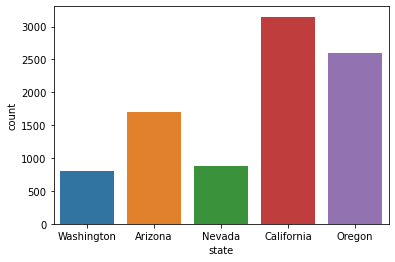

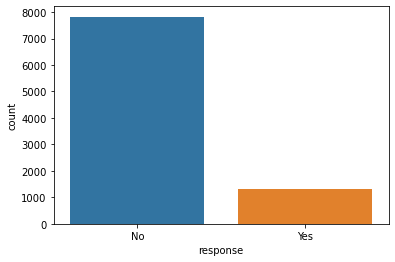

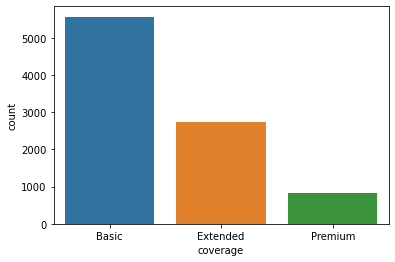

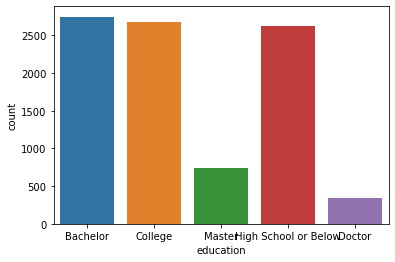

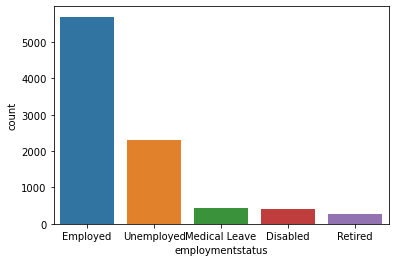

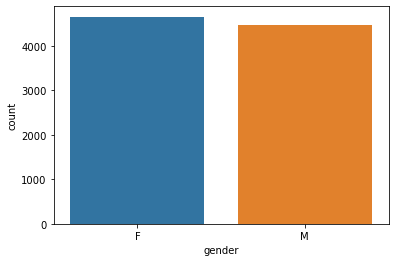

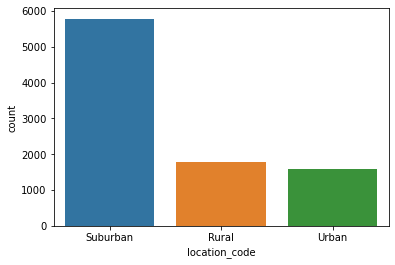

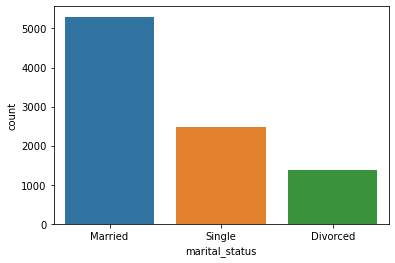

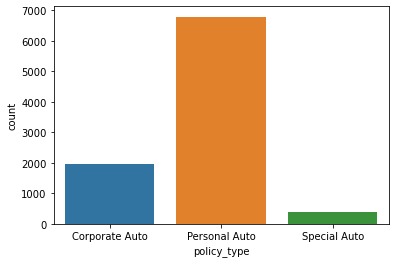

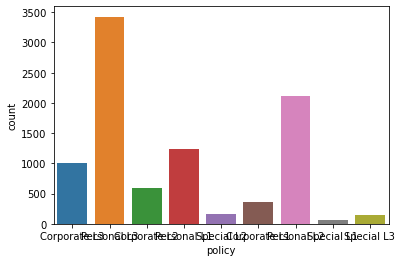

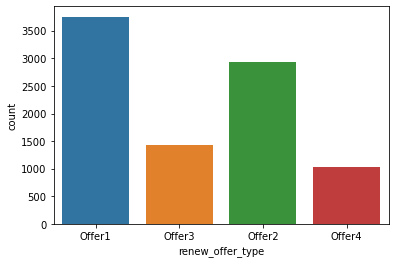

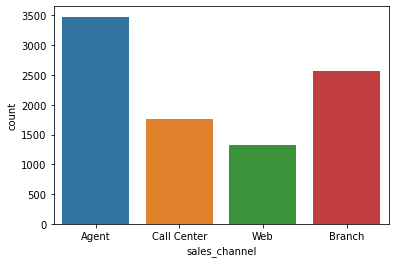

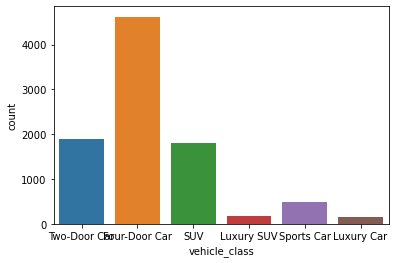

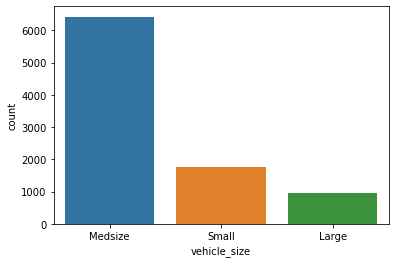

In [37]:
def plot_countplot(df): # for categorical and discrete-numerical columns
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None

plot_countplot(categorical_df)

# Feature extraction

In [39]:
# Open the categoricals variable we created before.
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


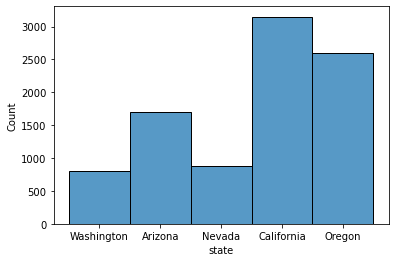

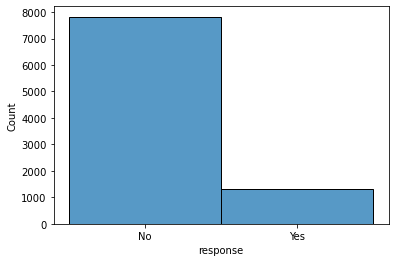

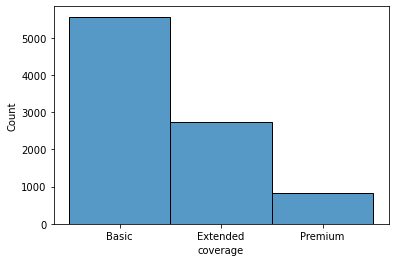

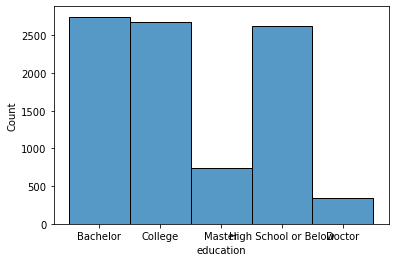

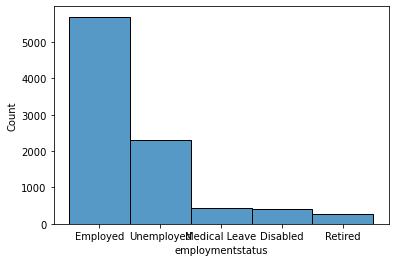

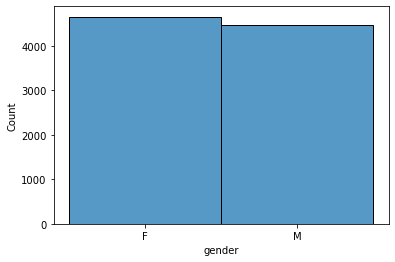

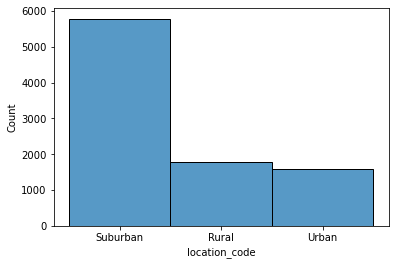

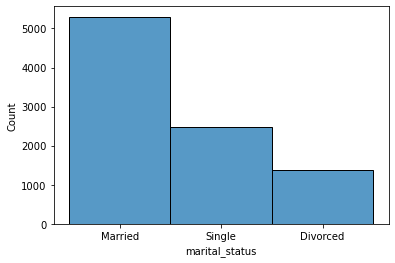

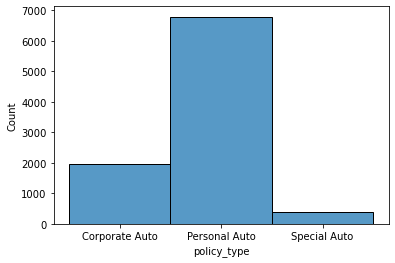

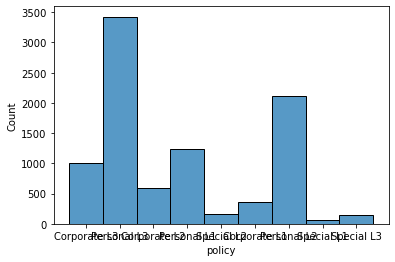

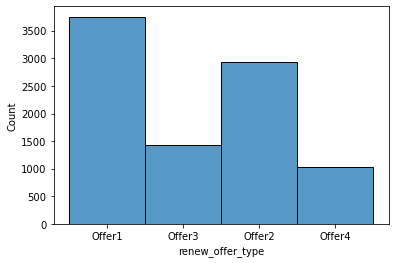

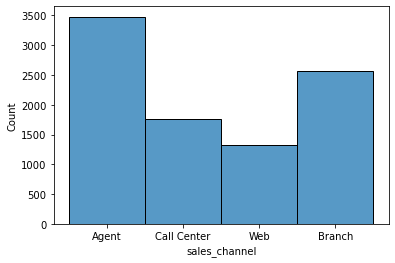

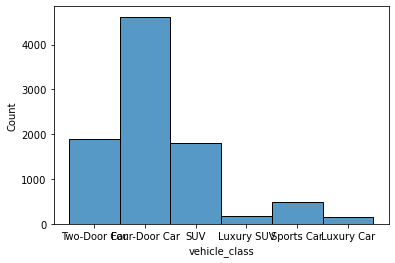

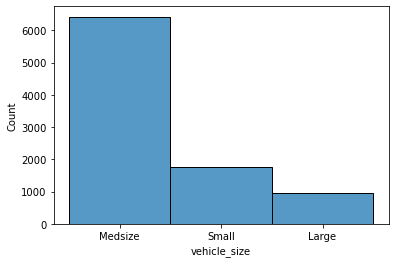

In [38]:
# Plot all the categorical variables with the proper plot. 

plot_disc_hist(categorical_df)

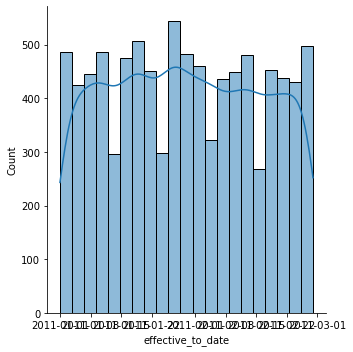

In [40]:
sns.displot(data=customer_df, x='effective_to_date', kde = True)

# X-y split

In [228]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

In [229]:
y = customer_df['total_claim_amount']
X = customer_df.drop(['total_claim_amount'], axis=1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [231]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7307, 21), (1827, 21), (7307,), (1827,))

In [189]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [190]:
X.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [191]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [192]:
customer_df['number_of_policies'] = customer_df['number_of_policies'].astype(object)


In [193]:
customer_df['number_of_open_complaints'] = customer_df['number_of_open_complaints'].astype(object)


In [194]:
customer_df.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                object
number_of_policies                       object
policy_type                              object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [195]:
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include=object)

In [234]:
X_train_num.shape, X_train_cat.shape

((7307, 5), (7307, 15))

In [235]:
X_test_num.shape, X_test_cat.shape

((1827, 5), (1827, 15))

In [196]:
X_train_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
5123,4768.955924,51144,61,28,32
7738,2827.559570,0,79,30,25
214,2912.892035,81097,74,7,67
8580,5138.244998,72264,64,2,66
7857,2610.369217,54737,66,3,86


In [197]:
X_train_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
5123,Washington,No,Basic,Bachelor,Employed,M,Urban,Married,1,9,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
7738,Oregon,No,Extended,College,Unemployed,F,Suburban,Single,0,1,Special Auto,Offer3,Branch,Four-Door Car,Medsize
214,Arizona,No,Basic,College,Employed,M,Suburban,Divorced,0,1,Personal Auto,Offer4,Agent,Four-Door Car,Small
8580,California,No,Basic,Bachelor,Employed,F,Urban,Married,0,9,Corporate Auto,Offer3,Web,Four-Door Car,Medsize
7857,Washington,No,Basic,Bachelor,Employed,F,Suburban,Single,0,1,Personal Auto,Offer3,Web,Four-Door Car,Medsize


# MinMax scaling

In [236]:
from sklearn.preprocessing import StandardScaler

#X_train

X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1,columns=X_train_num.columns)
X_train_scale.head()
X_train_scale.shape

(7307, 5)

In [237]:
#X_test

X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2,columns=X_test_num.columns)
X_test_scale.head()
X_test_scale.shape

(1827, 5)

In [227]:
X_train_scale.shape, X_test_scale.shape

((7307, 5), (1827, 5))

In [202]:
# deciding which categorical columns to go into onehot_encoder and ordinal 

# One-hot encoding

In [203]:
X_train_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [204]:
X_train_cat_onehots = X_train_cat.loc[:,['state', 'response','gender', 'marital_status','number_of_open_complaints', 'number_of_policies', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]

In [238]:
X_train_cat_onehots.head()
X_train_cat_onehots.shape

(7307, 10)

In [206]:
X_train_cat_onehots = X_train_cat_onehots.reset_index(drop = True)

In [207]:
X_train_cat_ordinals = X_train_cat.loc[:,['coverage','employmentstatus', 'education', 'location_code','vehicle_size']]

In [239]:
X_train_cat_ordinals.head()
X_train_cat_ordinals.shape

(7307, 5)

In [242]:
X_test_cat_onehots = X_test_cat.loc[:,['state', 'response','gender', 'marital_status','number_of_open_complaints', 'number_of_policies', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
X_test_cat_ordinals = X_test_cat.loc[:,['coverage','employmentstatus', 'education', 'location_code','vehicle_size']]


In [243]:
X_test_cat_onehots.head()
X_test_cat_ordinals.head()

X_test_cat_onehots.shape, X_test_cat_ordinals.shape

((1827, 10), (1827, 5))

In [244]:
from sklearn.preprocessing import OneHotEncoder
#X_train
encoder = OneHotEncoder(drop='first').fit(X_train_cat_onehots)

cols = encoder.get_feature_names_out(input_features=X_train_cat_onehots.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat_onehots).toarray(),columns=cols)
X_train_cat_encode.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [245]:
#X_test

cols = encoder.get_feature_names_out(input_features=X_test_cat_onehots.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat_onehots).toarray(),columns=cols)

X_test_cat_encode.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
X_train_cat_encode.shape, X_test_cat_encode.shape

((7307, 34), (1827, 34))

# Ordinal Encoding

In [213]:
X_train_cat_ordinals["coverage"] = X_train_cat_ordinals["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})

X_train_cat_ordinals["education"] = X_train_cat_ordinals["education"].map({"High School or Below" : 0, "College" : 0.1, "Bachelor" : 0.3, "Master" : 0.6, "Doctor" : 1})

X_train_cat_ordinals["employmentstatus"] = X_train_cat_ordinals["employmentstatus"].map({"Medical Leave" : 0,"Disabled" : 0, "Unemployed" : 0, "Retired" : 0.25, "Employed" : 1})

X_train_cat_ordinals["location_code"] = X_train_cat_ordinals["location_code"].map({"Rural" : 0, "Suburban" : 0.25, "Urban" : 1})

X_train_cat_ordinals["vehicle_size"] = X_train_cat_ordinals["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})


In [247]:
X_test_cat_ordinals["coverage"] = X_test_cat_ordinals["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})

X_test_cat_ordinals["education"] = X_test_cat_ordinals["education"].map({"High School or Below" : 0, "College" : 0.1, "Bachelor" : 0.3, "Master" : 0.6, "Doctor" : 1})

X_test_cat_ordinals["employmentstatus"] = X_test_cat_ordinals["employmentstatus"].map({"Medical Leave" : 0,"Disabled" : 0, "Unemployed" : 0, "Retired" : 0.25, "Employed" : 1})

X_test_cat_ordinals["location_code"] = X_test_cat_ordinals["location_code"].map({"Rural" : 0, "Suburban" : 0.25, "Urban" : 1})

X_test_cat_ordinals["vehicle_size"] = X_test_cat_ordinals["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})


In [249]:
X_train_cat_ordinals = X_train_cat_ordinals.reset_index(drop=True)
X_train_cat_ordinals
X_train_cat_ordinals.head()
X_train_cat_ordinals.shape

(7307, 5)

In [250]:
X_test_cat_ordinals = X_test_cat_ordinals.reset_index(drop=True)
X_test_cat_ordinals
X_test_cat_ordinals.head()
X_test_cat_ordinals.shape

(1827, 5)

# Concatenating numerical and categorical

In [256]:
X_train_processed = pd.concat((X_train_scale, X_train_cat_encode, X_train_cat_ordinals ),axis=1)
X_test_processed = pd.concat((X_test_scale, X_test_cat_encode, X_test_cat_ordinals ),axis=1)

In [257]:
X_train_processed.shape, X_test_processed.shape

((7307, 44), (1827, 44))

In [266]:
X_train_processed.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employmentstatus,education,location_code,vehicle_size
0,-0.479124,0.451347,-0.939028,1.278496,-0.570400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.3,1.00,0.5
1,-0.764993,-1.242714,-0.419953,1.476446,-0.820599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.1,0.25,0.5
2,-0.752428,1.443490,-0.564141,-0.799983,0.680592,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.25,0.0
3,-0.424747,1.150912,-0.852516,-1.294859,0.644850,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,1.00,0.5
4,-0.796975,0.570359,-0.794841,-1.195884,1.359702,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.25,0.5


In [273]:
X_train_processed.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
state_California                 float64
state_Nevada                     float64
state_Oregon                     float64
state_Washington                 float64
response_Yes                     float64
gender_M                         float64
marital_status_Married           float64
marital_status_Single            float64
number_of_open_complaints_1      float64
number_of_open_complaints_2      float64
number_of_open_complaints_3      float64
number_of_open_complaints_4      float64
number_of_open_complaints_5      float64
number_of_policies_2             float64
number_of_policies_3             float64
number_of_policies_4             float64
number_of_policies_5             float64
number_of_policies_6             float64
number_of_policies_7             float64
number_of_polici

In [260]:
X_test_processed.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employmentstatus,education,location_code,vehicle_size
0,-0.559570,1.227791,0.358659,-1.393834,0.037225,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.5
1,-0.369367,-0.473656,-0.650653,-0.799983,-1.356738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.5
2,-0.620606,1.900791,0.012609,-1.195884,-0.355944,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.1,0.25,0.0
3,-0.015898,1.312852,0.156797,-1.195884,-0.749113,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.1,1.00,0.5
4,-0.013410,-0.455405,-0.708328,0.288744,-1.213768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.5


Encoder Type	Column
One hot	state
Ordinal	coverage
Ordinal	employmentstatus
Ordinal	location code
One hot	marital status
One hot	policy type
One hot	policy
One hot	renew offercustomer_df
One hot	sales channel
One hot	vehicle class
Ordinal	vehicle size
Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

# Applying the Model

In [276]:
models = []

models.append(SGDRegressor())
models.append(LinearRegression())
models.append(KNeighborsRegressor())
models.append(SGDRegressor())
models.append(MLPRegressor())
models.append(RandomForestRegressor())

for model in models:
    model.fit(X_train_processed,y_train)
    print(type(model).__name__)
    print('Train score:', round(model.score(X_train_processed, y_train),2)*100)
    print('Test score:', round(model.score(X_test_processed, y_test),2)*100)
    MSE = mean_squared_error(y_test, model.predict(X_test_processed))
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:",RMSE,'\n')

SGDRegressor
Train score: 57.99999999999999
Test score: 55.00000000000001
Root Mean Square Error: 188.3769082390578 

LinearRegression
Train score: 59.0
Test score: 55.00000000000001
Root Mean Square Error: 188.34129010858254 

KNeighborsRegressor
Train score: 70.0
Test score: 52.0
Root Mean Square Error: 196.08918599043974 

SGDRegressor
Train score: 57.99999999999999
Test score: 55.00000000000001
Root Mean Square Error: 188.41416185671653 

MLPRegressor
Train score: 73.0
Test score: 70.0
Root Mean Square Error: 153.62859516274264 



/Users/begumerdem/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
